# MAT 388, HW4

### **Ezgi Özgen 090180344**

## Q1

For this question we are goint to use [CELEB_A](https://www.tensorflow.org/datasets/catalog/celeb_a) dataset through [tensorflow datasets](https://www.tensorflow.org/datasets).

1. Ingest the data, and select 10000 images from the dataset. Put the images under a variable called `X` and class labels (attributes) into `y`.
2. Build a neural network model for `X` against `Glasses` attribute in `y`.
3. Test the accuracy of your model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)
4. Repeat Steps 2 and 3 for `Male` and `Bangs` attributes.
5. Compare your results for `Glasses`, `Male` and `Bangs`. Which one is better? Why? Explain.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from random import randint

from keras.preprocessing import sequence 
from keras.datasets import imdb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Conv2D, Embedding, Flatten, Dropout,MaxPooling1D
from keras.callbacks import EarlyStopping

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

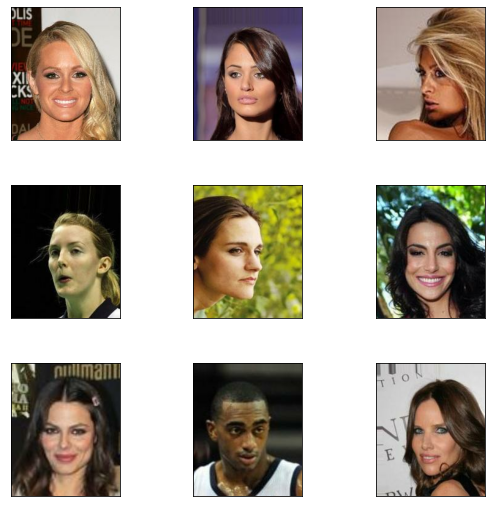

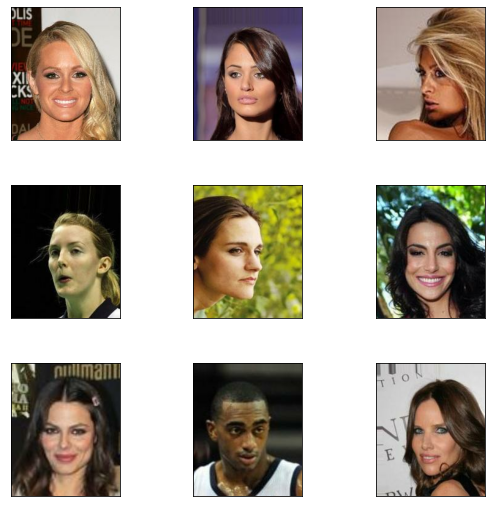

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

(train, test), info = tfds.load('celeb_a', split=['train','test'], with_info=True, shuffle_files=True)
tfds.show_examples(train,info)

In [3]:
def tfGetData(df,N,attr):
    X_train = []
    y_train = []
    fn = {True: 1, False: 0}
    for u in df.take(N):
        X_train.append(u['image'].numpy().reshape((218,178,3)))
        y_train.append(fn.get(u['attributes'][attr].numpy(),0))
    return X_train,y_train

In [9]:
import numpy as np
X_df,y_df = tfGetData(train,10000,'Eyeglasses')

In [10]:
X_df = np.array(X_df)
y_df = np.array(y_df)


In [11]:
print(X_df.shape,y_df.shape)

(10000, 218, 178, 3) (10000,)


In [12]:
from keras import layers
from keras import models
model = Sequential()
model.add(Conv2D(3, 2, activation='softmax', input_shape=(218,178,3))) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adamax', 
              metrics = ['accuracy'])

In [13]:
from sklearn.model_selection import KFold
from scipy.stats import t

# Split the data into folds
kf = KFold(n_splits=5)

# Initialize a list to store the scores for each fold
scores = []

# Iterate over the folds
for train_index, test_index in kf.split(X_df,y_df):
    # Split the data into training and test sets for this fold
    X_train, X_test = X_df[train_index], X_df[test_index]
    y_train, y_test = y_df[train_index], y_df[test_index]

    # Train the model on the training data
    model.fit(X_train, y_train,
              batch_size = 64,
              epochs = 3)

    # Evaluate the model on the test data
    score = model.evaluate(X_test, y_test)
    scores.append(score[1])
    

experiments = np.array(scores)
print(t.interval(0.95,4,loc=experiments.mean(),scale=experiments.var()))

Epoch 1/3
125/125 [==============================] - 71s 518ms/step - loss: 1.0895 - accuracy: 0.8810
Epoch 2/3
125/125 [==============================] - 65s 517ms/step - loss: 0.3724 - accuracy: 0.9164
Epoch 3/3
63/63 [==============================] - 6s 96ms/step - loss: 0.2988 - accuracy: 0.9315
Epoch 1/3
125/125 [==============================] - 63s 507ms/step - loss: 0.2556 - accuracy: 0.9326
Epoch 2/3
125/125 [==============================] - 64s 513ms/step - loss: 0.2524 - accuracy: 0.9329
Epoch 3/3
63/63 [==============================] - 6s 94ms/step - loss: 0.2518 - accuracy: 0.9340
Epoch 1/3
125/125 [==============================] - 64s 512ms/step - loss: 0.2577 - accuracy: 0.9329
Epoch 2/3
125/125 [==============================] - 64s 516ms/step - loss: 0.2549 - accuracy: 0.9329
Epoch 3/3
63/63 [==============================] - 6s 96ms/step - loss: 0.2624 - accuracy: 0.9340
Epoch 1/3
125/125 [==============================] - 64s 510ms/step - loss: 0.2530 - accuracy:

**The ttest result interval (0.9330951780148736, 0.9331048399142036) came with a confidence ratio of 95.**

In [93]:
X_df_Male,y_df_Male = tfGetData(train,10000,'Male')

In [96]:
X_df_Male = np.array(X_df_Male)
y_df_Male = np.array(y_df_Male)

(10000, 218, 178, 3) (10000,)


In [99]:
kf = KFold(n_splits=5)
scores_m = []

for train_index, test_index in kf.split(X_df_Male,y_df_Male):
    
    X_train, X_test = X_df_Male[train_index], X_df_Male[test_index]
    y_train, y_test = y_df_Male[train_index], y_df_Male[test_index]
    
    model.fit(X_train, y_train,
              batch_size = 64,
              epochs = 3)
              
    score_m = model.evaluate(X_test, y_test)
    scores_m.append(score_m[1])
    

experiments_m = np.array(scores_m)
print(t.interval(0.95,4,loc=experiments_m.mean(),scale=experiments_m.var()))

Epoch 1/3
125/125 [==============================] - 58s 453ms/step - loss: 1.7941 - accuracy: 0.5790
Epoch 2/3
125/125 [==============================] - 57s 456ms/step - loss: 0.5900 - accuracy: 0.6875
Epoch 3/3
63/63 [==============================] - 5s 78ms/step - loss: 0.4733 - accuracy: 0.7670
Epoch 1/3
125/125 [==============================] - 60s 476ms/step - loss: 0.4542 - accuracy: 0.7862
Epoch 2/3
125/125 [==============================] - 56s 446ms/step - loss: 0.4064 - accuracy: 0.8129
Epoch 3/3
63/63 [==============================] - 5s 80ms/step - loss: 0.3414 - accuracy: 0.8570
Epoch 1/3
125/125 [==============================] - 56s 447ms/step - loss: 0.3543 - accuracy: 0.8390
Epoch 2/3
125/125 [==============================] - 56s 445ms/step - loss: 0.3194 - accuracy: 0.8579
Epoch 3/3
63/63 [==============================] - 5s 78ms/step - loss: 0.2296 - accuracy: 0.9020
Epoch 1/3
125/125 [==============================] - 54s 429ms/step - loss: 0.2660 - accuracy:

**The ttest result interval (0.8680166402847147, 0.8905833562820578) came with a confidence ratio of 95.**

In [4]:
X_df_Bang,y_df_Bang = tfGetData(train,10000,'Bangs')

In [5]:
X_df_Bang = np.array(X_df_Bang)
y_df_Bang = np.array(y_df_Bang)

In [8]:
from sklearn.model_selection import KFold
from scipy.stats import t

# Split the data into folds
kf = KFold(n_splits=5)

# Initialize a list to store the scores for each fold
scoreBangs = []

# Iterate over the folds
for train_index, test_index in kf.split(X_df_Bang,y_df_Bang):
    # Split the data into training and test sets for this fold
    X_train, X_test = X_df_Bang[train_index], X_df_Bang[test_index]
    y_train, y_test = y_df_Bang[train_index], y_df_Bang[test_index]

    model.fit(X_train, y_train,
              batch_size = 64,
              epochs = 3)

    # Evaluate the model on the test data
    scoreBang = model.evaluate(X_test, y_test)
    scoreBangs.append(scoreBang[1])
    

experiments = np.array(scoreBangs)
print(t.interval(0.95,4,loc=experiments.mean(),scale=experiments.var()))

Epoch 1/3
125/125 [==============================] - 66s 516ms/step - loss: 1.3295 - accuracy: 0.8159
Epoch 2/3
125/125 [==============================] - 64s 515ms/step - loss: 0.2886 - accuracy: 0.8875
Epoch 3/3
63/63 [==============================] - 6s 95ms/step - loss: 0.2182 - accuracy: 0.9120
Epoch 1/3
125/125 [==============================] - 68s 531ms/step - loss: 0.2156 - accuracy: 0.9133
Epoch 2/3
125/125 [==============================] - 65s 519ms/step - loss: 0.1831 - accuracy: 0.9294
Epoch 3/3
63/63 [==============================] - 6s 96ms/step - loss: 0.1704 - accuracy: 0.9365
Epoch 1/3
125/125 [==============================] - 64s 514ms/step - loss: 0.1469 - accuracy: 0.9414
Epoch 2/3
125/125 [==============================] - 64s 514ms/step - loss: 0.1192 - accuracy: 0.9563
Epoch 3/3
63/63 [==============================] - 6s 95ms/step - loss: 0.0872 - accuracy: 0.9655
Epoch 1/3
125/125 [==============================] - 64s 511ms/step - loss: 0.0976 - accuracy:

**The ttest result interval (0.9513124464541499, 0.9556875707119877) came with a confidence ratio of 95.**

**The model I set up with Bangs data gave the best result. I have observed that the accuracy increases when I run it more than once.**

## Q2

For this question use the [Hyperspectral Image of Kennedy Space Center](https://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes#Kennedy_Space_Center_.28KSC.29).

1. Ingest the image data directly from the web. (No local files!)
2. Ingest the ground truth data directly from the web. (No local files!)
4. Build a convolutional neural network (preferably using [this](https://keras.io/api/layers/convolution_layers/) and/or [this](https://keras.io/api/layers/recurrent_layers/conv_lstm2d/)) model.
5. Test the accuracy of the model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [11]:
import urllib.request
from scipy.io import loadmat

url = 'http://www.ehu.es/ccwintco/uploads/2/26/KSC.mat'
urllib.request.urlretrieve(url, 'data.mat')
data = loadmat('data.mat')['KSC']
url = 'http://www.ehu.es/ccwintco/uploads/a/a6/KSC_gt.mat'
urllib.request.urlretrieve(url, 'data.mat')
data1 = loadmat('data.mat')['KSC_gt']

In [12]:
from skimage.transform import resize
data.shape[:-1]
data =data.reshape(512*614,176)
data1=data1.reshape(512*614)
type(data1)

numpy.ndarray

In [13]:
X=data
y=data1
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y[:, None])
y.shape

(314368, 14)

In [61]:
X= data
y=data1

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y[:, None])

In [62]:
n_outputs = y.shape[1]

X[1].ravel().shape

(176,)

In [81]:
modelc = Sequential()
modelc.add(Conv1D(3, 2, activation='softmax', input_shape=(X.shape[1],1)))
modelc.add(Flatten()) 
modelc.add(Dense(256, activation='relu'))  
modelc.add(Dropout(0.25))
modelc.add(Dense(128, activation='relu')) 
modelc.add(Dense(14, activation='sigmoid'))
modelc.compile(loss = 'binary_crossentropy',
              optimizer = 'adamax', 
              metrics = ['accuracy'])

In [85]:
from sklearn.model_selection import KFold

# Split the data into folds
kf = KFold(n_splits=5)

# Initialize a list to store the scores for each fold
scoresc = []

# Iterate over the folds
for train_index, test_index in kf.split(X,y):
    # Split the data into training and test sets for this fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the training data
    modelc.fit(X_train, y_train,
              batch_size = 128,
              epochs = 3)

    # Evaluate the model on the test data
    scorec = modelc.evaluate(X_test, y_test, verbose=0)

    # Append the score to the list of scores
    scoresc.append(scorec[1])

experiments = np.array(scoresc)
print(t.interval(0.95,len(experiments)-1,loc = experiments.mean(),scale=experiments.var()))

Epoch 1/3
1965/1965 [==============================] - 20s 10ms/step - loss: 0.0121 - accuracy: 0.9798
Epoch 2/3
1965/1965 [==============================] - 21s 11ms/step - loss: 0.0120 - accuracy: 0.9798
Epoch 3/3
1965/1965 [==============================] - 21s 11ms/step - loss: 0.0119 - accuracy: 0.9798
Epoch 1/3
1965/1965 [==============================] - 21s 11ms/step - loss: 0.0092 - accuracy: 0.9849
Epoch 2/3
1965/1965 [==============================] - 21s 11ms/step - loss: 0.0092 - accuracy: 0.9848
Epoch 3/3
1965/1965 [==============================] - 21s 11ms/step - loss: 0.0091 - accuracy: 0.9849
Epoch 1/3
1965/1965 [==============================] - 22s 11ms/step - loss: 0.0103 - accuracy: 0.9833
Epoch 2/3
1965/1965 [==============================] - 21s 11ms/step - loss: 0.0101 - accuracy: 0.9833
Epoch 3/3
1965/1965 [==============================] - 21s 11ms/step - loss: 0.0100 - accuracy: 0.9833
Epoch 1/3
1965/1965 [==============================] - 21s 11ms/step - lo

**The ttest result interval (0.9831257464623132, 0.9834547636771521) came with a confidence ratio of 95.When I ran it more than once, the score increased, but it caused overfitting**

## Q3

For this question we are going to use the time series of [Wheat Futures](https://finance.yahoo.com/quote/ZW=F/) from Yahoo Finance.

1. Ingest the data using [yfinance](https://pypi.org/project/yfinance/) Start from Jan 1, 2010 until Dec 31, 2021.
2. Construct [a RNN and/or a LSTM](https://keras.io/api/layers/recurrent_layers/) model on the data.
3. Test your model on the wheat futures data from Jan 1, 2022 to today using a 5-fold cross-validation. Did your model work? Explain.

In [29]:
from datetime import date
from sklearn.model_selection import TimeSeriesSplit

In [30]:
import yfinance as yf
ticker = yf.Ticker("WEAT")
df = ticker.history(start='2010-01-01', end=date.today())
df.index = pd.to_datetime(df.index)
df_test = df[(df.index >= "2021-12-31")]['Open']
df_train = df[~df.index.isin(df_test.index)]['Open']

In [31]:
from tensorflow.keras.layers import Dense, LSTM, RNN, Dropout, SimpleRNN
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(SimpleRNN(64, input_shape = (1,1), activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))

# monitor validation progress
early = EarlyStopping(monitor = "val_loss", mode = "min")
callbacks_list = [early]
    
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam',
              metrics = ['mse'])

In [32]:
from sklearn.model_selection import KFold
# Split the data into folds
kf = KFold(n_splits=5)
for train_index, test_index in kf.split(df_train):    
    raw = df_test.to_numpy().reshape(df_test.shape[0],1,)
    y_test = raw[2:df_test.shape[0]]
    X_test = raw[1:df_test.shape[0]-1]
    X_train = df_train.iloc[train_index]
    y_train=df_train.iloc[train_index]
    # Fit the model on the training data
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), shuffle=False)
    # Evaluate the model on the test data
    scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/100
65/65 [==============================] - 1s 5ms/step - loss: 69.5412 - mse: 69.5412 - val_loss: 45.8644 - val_mse: 45.8644
Epoch 2/100
65/65 [==============================] - 0s 2ms/step - loss: 28.5264 - mse: 28.5264 - val_loss: 12.6907 - val_mse: 12.6907
Epoch 3/100
65/65 [==============================] - 0s 2ms/step - loss: 7.8599 - mse: 7.8599 - val_loss: 1.7224 - val_mse: 1.7224
Epoch 4/100
65/65 [==============================] - 0s 2ms/step - loss: 2.6670 - mse: 2.6670 - val_loss: 0.1821 - val_mse: 0.1821
Epoch 5/100
65/65 [==============================] - 0s 2ms/step - loss: 1.9706 - mse: 1.9706 - val_loss: 0.1086 - val_mse: 0.1086
Epoch 6/100
65/65 [==============================] - 0s 2ms/step - loss: 1.9890 - mse: 1.9890 - val_loss: 0.0618 - val_mse: 0.0618
Epoch 7/100
65/65 [==============================] - 0s 2ms/step - loss: 1.9251 - mse: 1.9251 - val_loss: 0.0717 - val_mse: 0.0717
Epoch 8/100
65/65 [==============================] - 0s 2ms/step - loss: 1.

65/65 [==============================] - 0s 2ms/step - loss: 1.0545 - mse: 1.0545 - val_loss: 0.0669 - val_mse: 0.0669
Epoch 64/100
65/65 [==============================] - 0s 2ms/step - loss: 0.9660 - mse: 0.9660 - val_loss: 0.0778 - val_mse: 0.0778
Epoch 65/100
65/65 [==============================] - 0s 2ms/step - loss: 1.0720 - mse: 1.0720 - val_loss: 0.0399 - val_mse: 0.0399
Epoch 66/100
65/65 [==============================] - 0s 2ms/step - loss: 0.9964 - mse: 0.9964 - val_loss: 0.0627 - val_mse: 0.0627
Epoch 67/100
65/65 [==============================] - 0s 2ms/step - loss: 0.9484 - mse: 0.9484 - val_loss: 0.0480 - val_mse: 0.0480
Epoch 68/100
65/65 [==============================] - 0s 2ms/step - loss: 0.9814 - mse: 0.9814 - val_loss: 0.0715 - val_mse: 0.0715
Epoch 69/100
65/65 [==============================] - 0s 2ms/step - loss: 0.9651 - mse: 0.9651 - val_loss: 0.0940 - val_mse: 0.0940
Epoch 70/100
65/65 [==============================] - 0s 2ms/step - loss: 0.9589 - mse: 0

65/65 [==============================] - 0s 2ms/step - loss: 1.5492 - mse: 1.5492 - val_loss: 0.1010 - val_mse: 0.1010
Epoch 88/100
65/65 [==============================] - 0s 2ms/step - loss: 1.3379 - mse: 1.3379 - val_loss: 0.1046 - val_mse: 0.1046
Epoch 89/100
65/65 [==============================] - 0s 2ms/step - loss: 1.4559 - mse: 1.4559 - val_loss: 0.0765 - val_mse: 0.0765
Epoch 90/100
65/65 [==============================] - 0s 2ms/step - loss: 1.3286 - mse: 1.3286 - val_loss: 0.0788 - val_mse: 0.0788
Epoch 91/100
65/65 [==============================] - 0s 2ms/step - loss: 1.4606 - mse: 1.4606 - val_loss: 0.0657 - val_mse: 0.0657
Epoch 92/100
65/65 [==============================] - 0s 2ms/step - loss: 1.3846 - mse: 1.3846 - val_loss: 0.0852 - val_mse: 0.0852
Epoch 93/100
65/65 [==============================] - 0s 3ms/step - loss: 1.3775 - mse: 1.3775 - val_loss: 0.0702 - val_mse: 0.0702
Epoch 94/100
65/65 [==============================] - 0s 3ms/step - loss: 1.4371 - mse: 1

65/65 [==============================] - 0s 2ms/step - loss: 1.1748 - mse: 1.1748 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 12/100
65/65 [==============================] - 0s 2ms/step - loss: 1.2641 - mse: 1.2641 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 13/100
65/65 [==============================] - 0s 2ms/step - loss: 1.2124 - mse: 1.2124 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 14/100
65/65 [==============================] - 0s 2ms/step - loss: 1.1365 - mse: 1.1365 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 15/100
65/65 [==============================] - 0s 2ms/step - loss: 1.1114 - mse: 1.1114 - val_loss: 0.0162 - val_mse: 0.0162
Epoch 16/100
65/65 [==============================] - 0s 2ms/step - loss: 1.1223 - mse: 1.1223 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 17/100
65/65 [==============================] - 0s 2ms/step - loss: 1.1786 - mse: 1.1786 - val_loss: 0.0195 - val_mse: 0.0195
Epoch 18/100
65/65 [==============================] - 0s 2ms/step - loss: 1.1240 - mse: 1

Epoch 35/100
65/65 [==============================] - 0s 2ms/step - loss: 1.0300 - mse: 1.0300 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 36/100
65/65 [==============================] - 0s 2ms/step - loss: 1.0013 - mse: 1.0013 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 37/100
65/65 [==============================] - 0s 2ms/step - loss: 0.9770 - mse: 0.9770 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 38/100
65/65 [==============================] - 0s 2ms/step - loss: 1.0944 - mse: 1.0944 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 39/100
65/65 [==============================] - 0s 2ms/step - loss: 1.0622 - mse: 1.0622 - val_loss: 7.0818e-04 - val_mse: 7.0818e-04
Epoch 40/100
65/65 [==============================] - 0s 2ms/step - loss: 1.0098 - mse: 1.0098 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 41/100
65/65 [==============================] - 0s 2ms/step - loss: 1.0371 - mse: 1.0371 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 42/100
65/65 [==============================] - 0s 2ms/step - 

In [34]:
import pandas as pd
Y_pred = model.predict(X_test)
res = pd.DataFrame({'X_test': X_test.reshape(X_test.shape[0]), 
                    'Y_test': y_test.reshape(y_test.shape[0]), 
                    'Y_pred': Y_pred.reshape(Y_pred.shape[0])})
res

8/8 [==============================] - 0s 1ms/step


,X_test,Y_test,Y_pred
0,7.39,7.39,7.335700
1,7.27,7.27,7.216342
2,7.39,7.39,7.335700
3,7.32,7.32,7.266075
4,7.22,7.22,7.166609
...,...,...,...
238,7.64,7.64,7.584363
239,7.60,7.60,7.544577
240,7.59,7.59,7.534631
241,7.64,7.64,7.584363


In [35]:
model.evaluate(X_test, y_test, batch_size = 32) 

8/8 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041


[0.004054506309330463, 0.004054506309330463]

<AxesSubplot:>

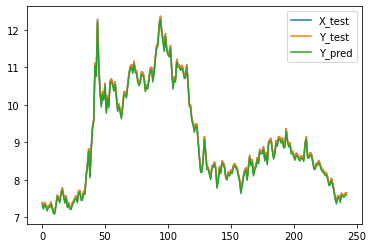

In [36]:
res.plot()

**The model I set up worked, but even if the graph looks nice, the result given followed trend only, result failed**

## Q4

For this question, we are going to use [Consumer Complaints Dataset](https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv).

1. Ingest the dataset. We are only going to use the columns `Issue` and `Timely Response?`.
2. Convert the values in the issue column to vectors using [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) from `scikit-learn`. Similarly, binarize the column `Timely Response` using [Label Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).
3. Split your dataset into train and test.
3. Construct an an appropriate neural network model on the train set.
4. Test your model on the test set. Did your model work? Explain.

In [37]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv')
data = data[['Issue','Timely response?']]
data = data.dropna()

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
vectorizer = CountVectorizer()
issue= vectorizer.fit_transform(data['Issue'])
binarizer = LabelBinarizer()
time = binarizer.fit_transform(data['Timely response?'])
issue = issue.toarray()
time

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(issue,time,train_size=0.5)

In [51]:
model = Sequential() 
model.add(Embedding(2000, 128)) 
model.add(LSTM(128, dropout = 0.25, recurrent_dropout = 0.1)) 
model.add(Dense(128,activation='linear'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [52]:
model.fit(X_train, Y_train,
          batch_size = 8,
          epochs = 12,
          validation_data = (X_test, Y_test))

Epoch 1/12
1760/1760 [==============================] - 1327s 744ms/step - loss: 0.1285 - accuracy: 0.9731 - val_loss: 0.1143 - val_accuracy: 0.9757
Epoch 2/12
1760/1760 [==============================] - 1270s 722ms/step - loss: 0.1228 - accuracy: 0.9737 - val_loss: 0.1258 - val_accuracy: 0.9757
Epoch 3/12
1760/1760 [==============================] - 1247s 708ms/step - loss: 0.1238 - accuracy: 0.9737 - val_loss: 0.1152 - val_accuracy: 0.9757
Epoch 4/12
1760/1760 [==============================] - 1245s 708ms/step - loss: 0.1235 - accuracy: 0.9737 - val_loss: 0.1147 - val_accuracy: 0.9757
Epoch 5/12
1760/1760 [==============================] - 1224s 695ms/step - loss: 0.1225 - accuracy: 0.9737 - val_loss: 0.1144 - val_accuracy: 0.9757
Epoch 6/12
1760/1760 [==============================] - 1226s 697ms/step - loss: 0.1225 - accuracy: 0.9737 - val_loss: 0.1180 - val_accuracy: 0.9757
Epoch 7/12
1760/1760 [==============================] - 1224s 696ms/step - loss: 0.1232 - accuracy: 0.9737

In [53]:
model.evaluate(X_test,Y_test,batch_size=10)
Y_pred = model.predict(X_test).argmax(axis=1)
confusion_matrix(Y_test,Y_pred)

440/440 [==============================] - 31s 71ms/step


array([[  342,     0],
       [13735,     0]], dtype=int64)

In [54]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.02      1.00      0.05       342
           1       0.00      0.00      0.00     13735

    accuracy                           0.02     14077
   macro avg       0.01      0.50      0.02     14077
weighted avg       0.00      0.02      0.00     14077



C:\Users\EzgiOzgen\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EzgiOzgen\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EzgiOzgen\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

**The model I set up worked, but I got a constant model. My model assigned zero to all of them. it did not see 1s. The reason for this may be due to the uneven distribution of data labels.** **running it over and over again may have caused overfitting.**